## HW03 Notebook

Complete the following notebook, as described in the PDF for Homework 03 (included in the download with the starter code). Submit the following:
1. This notebook file and `hw3.py`, along with your COLLABORATORS.txt file, to the Gradescope link for code.
2. A PDF of this notebook and all of its output, once it is completed, to the Gradescope link for the PDF.

__NOTE__: The purpose of this notebook is to demonstrate the functionality implemented in `hw3.py`. As part of this demo, all analysis (i.e., questions that prompt for a short answer) are to be added to the notebook. Keep the order of the problems as listed in the assignment description. Furthermore, cells are provided as placeholders for each response; however, cells can be added as needed.

Please report any questions to the [class Piazza page](https://piazza.com/class/lcwv1h9p2a11ai).

### Import required libraries.

In [403]:
import os
import numpy as np
import pandas as pd

import warnings

import sklearn.linear_model
import sklearn.metrics
from hw3 import calc_confusion_matrix_for_threshold
from hw3 import calc_percent_cancer
from hw3 import calc_binary_metrics
from hw3 import predict_0_always_classifier
from hw3 import calc_accuracy
from hw3 import print_perf_metrics_for_threshold
from hw3 import calc_perf_metrics_for_threshold

from matplotlib import pyplot as plt
import seaborn as sns

# load .py changes
%load_ext autoreload
%autoreload 2

%matplotlib inline
plt.style.use('seaborn-v0_8') # pretty matplotlib plots

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### 1) Function to calculate TP, TN, FP, and FN.
The following four calls to the function `calc_binary_metrics` to test it. This way, the function can be tested for several edge cases. ***Don't modify this.***

In [404]:
all0 = np.zeros(10)
all1 = np.ones(10)
TP, TN, FP, FN = calc_binary_metrics(all0, all1)
print(f"0 vs 1\n========\nTP: {TP}\nTN: {TN}\nFP: {FP}\nFN: {FN}")

0 vs 1
TP: 0.0
TN: 0.0
FP: 10.0
FN: 0.0


In [405]:
TP, TN, FP, FN = calc_binary_metrics(all1, all0)
print(f"1 vs 0\n========\nTP: {TP}\nTN: {TN}\nFP: {FP}\nFN: {FN}")

1 vs 0
TP: 0.0
TN: 0.0
FP: 0.0
FN: 10.0


In [406]:
TP, TN, FP, FN = calc_binary_metrics(all1, all1)
print(f"1 vs 1\n========\nTP: {TP}\nTN: {TN}\nFP: {FP}\nFN: {FN}")

1 vs 1
TP: 10.0
TN: 0.0
FP: 0.0
FN: 0.0


In [407]:
TP, TN, FP, FN = calc_binary_metrics(all0, all0)
print(f"0 vs 0\n========\nTP: {TP}\nTN: {TN}\nFP: {FP}\nFN: {FN}")

0 vs 0
TP: 0.0
TN: 10.0
FP: 0.0
FN: 0.0


### Load the dataset.

The following should ***not*** be modified.

After it runs, the various arrays it creates will contain the 2- or 3-feature input datasets.

In [408]:
# Load the x-data and y-class arrays
x_train = np.loadtxt('./data/x_train.csv', delimiter=',', skiprows=1)
x_test = np.loadtxt('./data/x_test.csv', delimiter=',', skiprows=1)

y_train = np.loadtxt('./data/y_train.csv', delimiter=',', skiprows=1)
y_test = np.loadtxt('./data/y_test.csv', delimiter=',', skiprows=1)

Inspect Data. The following should ***not*** be modified.

In [409]:
feat_names = np.loadtxt(f'data/x_train.csv', delimiter=',', dtype=str, max_rows=1)
print(f"features: {feat_names}\n")
target_name = np.loadtxt(f'data/x_test.csv', delimiter=',', dtype=str, max_rows=1)
df_sampled_data = pd.DataFrame(x_test, columns=feat_names)
df_sampled_data[str(target_name)] = y_test
df_sampled_data.sample(15)

features: ['age' 'famhistory' 'marker']



,age,famhistory,marker,['age' 'famhistory' 'marker']
38,73.63665,0.0,0.056692,0.0
52,62.62249,0.0,0.117912,0.0
171,77.83170,0.0,0.154658,1.0
149,65.59784,0.0,3.789782,0.0
69,59.79506,0.0,0.484963,0.0
174,70.87283,0.0,0.363768,0.0
113,69.00063,1.0,0.375517,0.0
87,66.23900,0.0,0.831403,0.0
74,69.49271,0.0,0.649917,0.0
44,67.23566,0.0,0.193319,0.0


### 2) Compute the fraction of patients with cancer.

Complete the following code.  Your solution needs to ***compute*** these values from the training and testing sets (i.e., don't simply hand-count and print the values).

In [410]:
#TODO: modify these prints
tr_percent = calc_percent_cancer(y_train)
te_percent = calc_percent_cancer(y_test)

print("Percent of data that has_cancer on TRAIN: %.3f" % tr_percent)
print("Percent of data that has_cancer on TEST : %.3f" % te_percent)

Percent of data that has_cancer on TRAIN: 14.035
Percent of data that has_cancer on TEST : 13.889


### 3) The predict-0-always baseline

#### (i) Compute the accuracy of the always-0 classifier.

Complete the functions to compute and calculate the accuracy of the always-0 classifier on validation and test outputs.

In [411]:
#TODO: implement predict_0_always_classifer()
y_train_pred = predict_0_always_classifier(x_train)
y_test_pred = predict_0_always_classifier(x_test)

acc_train = calc_accuracy(*calc_binary_metrics(y_train, y_train_pred))
acc_test = calc_accuracy(*calc_binary_metrics(y_test, y_test_pred))
print("acc on TRAIN: %.3f" % acc_train) #TODO: modify these values
print("acc on TEST : %.3f" % acc_test)

acc on TRAIN: 0.860
acc on TEST : 0.861


#### (ii) Print a confusion matrix for the always-0 classifier.

Add code below to generate a confusion matrix for the always-0 classifier on the test set.

In [412]:
# TODO: call print(calc_confusion_matrix_for_threshold(...))
print(calc_confusion_matrix_for_threshold(y_true_N=y_test, y_proba1_N=y_test_pred)) # args : y_true_N, y_proba1_N, thresh=0.5

Predicted    0  1
True             
0          155  0
1           25  0


#### (iii) Reflect on the accuracy of the always-0 classifier.

**Answer**: TODO
(2) You will see reasonable accuracy for the simple baseline classifier. Why not just use it for this task? Your answer, written into the notebook as
text, should detail the pluses and minuses of using this simple classifier

This is pretty good accuracy at roughly 86%. Since we are always assuming there is no cancer; however, that is very dangerous if 14% of people have cancer and we choose not to biopsy them. That is unacceptable. If this was a social media algorithm like a recommender, 86% is plenty good, but life and death needs far better accuracy. It is safer to biopsy all patients to catch the 14% but you don't want to biopsy an unnecessary 86% on the other hand. That is why we can't use only a always-0 or always-1 predictor since surgery and people's lives are the consequences.

DO THISSSSSSSSSSSSSSSS

#### (iv) Analyze the various costs of using the always-0 classifier.

**Answer**: TODO

Additional costs of not taking biopsies of 14% of patients that have cancer beyond death is the doctors and/or hospital can be sued for negligence or medical malpractice.

DO THISSSSSSSSSSSSSSSS

### 4: Basic Perceptron Models

#### (i) Normalize data

In [413]:
from hw3 import standardize_data
# print(x_test)
#TODO
X_train, X_test = standardize_data(X_train=x_train, X_test=x_test)

print(X_train)

[[0.53637473 0.         0.10816263]
 [0.43257395 0.         0.05418465]
 [0.72202778 1.         0.18904397]
 ...
 [0.45372565 0.         0.57842732]
 [0.33260801 0.         0.1189701 ]
 [0.62875077 0.         0.03734379]]


#### (ii) Create a basic `Perceptron` classifier

Fit a perceptron to the training data.  Print out accuracy on this data, as well as on testing data.  Print out a confusion matrix on the testing data.

In [414]:
#TODO: train a basic perceptron model using default parameter values, and modify these accuracies below
# Perceptron model
# # fit to training data
# # make prediction on test data

from hw3 import perceptron_classifier
# inputs => {normalized X_train, X_test; standard y_train, y_test}
pred_train, pred_test = perceptron_classifier(x_train=X_train, y_train=y_train, x_test=X_test, y_test=y_test)
# [opt args] default vals: penalty="l2", alpha=0, random_state=42)

from sklearn.metrics import accuracy_score
print("acc on TRAIN: %.3f" % accuracy_score(y_train, pred_train))
print("acc on TEST : %.3f" % accuracy_score(y_test, pred_test))
# print("acc on TRAIN: %.3f" % 0)
# print("acc on TEST : %.3f" % 0)

print("\nConfusion matrix for TEST:")
# TODO: call print(calc_confusion_matrix_for_threshold(...))
print(calc_confusion_matrix_for_threshold(y_test, pred_test))
# print(calc_confusion_matrix_for_threshold(...))
# print(calc_confusion_matrix_for_threshold(y_true_N, y_proba1_N, thresh=0.5))

acc on TRAIN: 0.249
acc on TEST : 0.878

Confusion matrix for TEST:
Predicted    0  1
True             
0          155  0
1           22  3


#### (iii) Compare the `Perceptron` to the always-0 classifier.

**Answer**:  TODO

The perceptron classifier is marginally better than the always-0 classifier on the test data as seen by the 87.8% accuracy vs the 86.4% accuracy rate. This classifier identifies 3 true positives which bumps the accuracy. In real terms it detects cancer in 3 of the 25 patients that have cancer as opposed to 0. We would like to increase this result, but it is better than predicting always-0 and assuming no patients have cancer. Additionally, all off the patients without cancer the perceptron categorizes correctly and there are no false positives.


#### (iv) Generate a series of regularized perceptron models
Each model will use a different `alpha` value, multiplying that by the L2 penalty.  You will record and plot the accuracy of each model on both training and test data.

In [415]:
# TODO: create, fit models here and record accuracy of each (Implement functions needed)
from hw3 import series_of_preceptrons

alphas = np.logspace(-5, 5, base=10, num=100)
# print(alphas)

train_accuracy_list, test_accuracy_list = series_of_preceptrons(x_train=X_train, y_train=y_train, x_test=X_test, y_test=y_test, alphas=alphas)

##### Plot accuracy on train/test data across the different alpha values plotted on a logarithmic scale. Make sure to show title, legends, and axis labels.

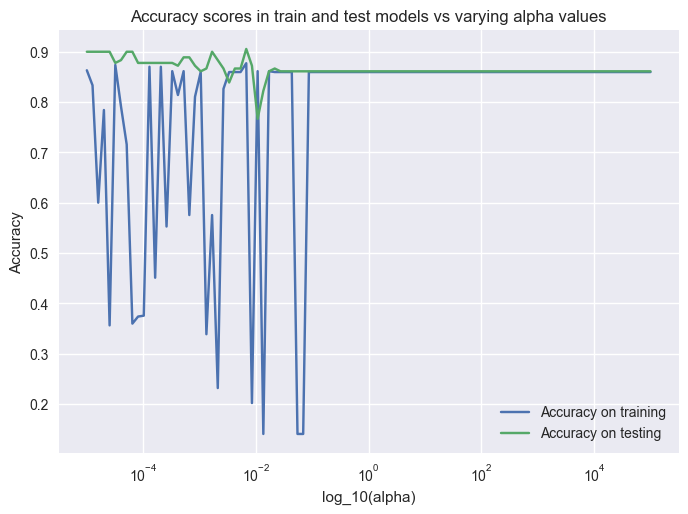

In [416]:
# TODO make plot
plt.plot(alphas, train_accuracy_list, label='Accuracy on training')
plt.plot(alphas, test_accuracy_list, label='Accuracy on testing')

# TODO add legend, titles, etc. set x-scale appropriately
plt.title('Accuracy scores in train and test models vs varying alpha values')
plt.legend(loc='lower right')
plt.xscale('log')
plt.xlabel('log_10(alpha)')
plt.ylabel('Accuracy')
plt.show()

#### (iv) Discuss what the plot is showing you.

**Answer**: TODO

The plot shows the accuracy score for each alpha level (totaling 100) for the training and testing data. As the log scale moves to the right we can see that accuracy on testing plateaus. It is slightly lower than some of the initial results, but as the sample size gets bigger, the accuracy score becomes stable. The training data is all over the place from below 20% accuracy to roughly 90% accuracy, which suggests that the alpha does not have a large impact in classification ability to determine whether a patient has cancer or doesn't. There is little correlation between training data and error rate with the way our series of preceptrons scores accuracy.
According to the confusion matrix of the perceptron with 3 True Positive (TP) values instead of 0 in the always-0 classifier, and 100% accuracy on the True Negative (TN) values, it appears that the accuracy score swings are largely impacted by incorrectly assuming patients have cancer when they don't - False Negative's (FN). Since approx 86% of patients don't have cancer in the trial, the accuracy score would have to go down by much more than predicting that no one has cancer. This would come down to classifying benign tumors as cancerous based on the input features, which is poor accuracy.


### 5: Decision functions and probabilistic predictions

#### (a) Create two new sets of predictions

Fit `Perceptron` and `CalibratedClassifierCV` models to the data.  Use their predictions to generate ROC curves.

In [417]:
# TODO: fit a Perceptron and generate its decision_function() over the test data.
    # _, decisions_test = perceptron_classifier()
    # _, pred_prob_test = calibrated_perceptron_classifier()


# TODO: Build a CalibratedClassifierCV, using a Perceptron as its base_estimator,
#       and generate its probabilistic predictions over the test data.



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


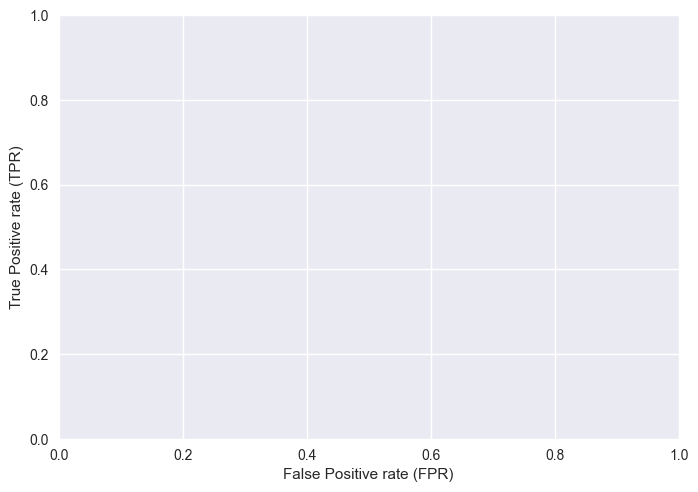

In [418]:
# TODO something like: fpr, tpr, thr = sklearn.metrics.roc_curve(...)
    # fpr, tpr, thr = sklearn.metrics.roc_curve(y_test, decisions_test)
    # plt.plot(fpr, tpr, label='Decision function version')

    # fpr2, tpr2, thr2 = sklearn.metrics.roc_curve(y_test, pred_prob_test)
    # plt.plot(fpr2, tpr2, label='Probabilistic version')

plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.xlabel("False Positive rate (FPR)");
plt.ylabel("True Positive rate (TPR)");

In [419]:
print("AUC on TEST for Perceptron: %.3f" % 0) #TODO: modify these values
print("AUC on TEST for probabilistic model: %.3f" % 0)

# print("AUC on TEST for Perceptron: %.3f" % sklearn.metrics.roc_auc_score(
#     y_test, decisions_test))
# print("AUC on TEST for probabilistic model: %.3f" % sklearn.metrics.roc_auc_score(
#         y_test, pred_prob_test))

AUC on TEST for Perceptron: 0.000
AUC on TEST for probabilistic model: 0.000


#### (b) Discuss the results above

**Answer**: TODO

#### (c) Compute model metrics for different probabilistic thresholds

Complete `calc_perf_metrics_for_threshold` that takes in a set of correct outputs, a matching set of probabilities generated by a classifier, and a threshold at which to set the positive decision probability, and returns a set of metrics if we use that threshold.

#### (d) Compare the probabilistic classifier across multiple decision thresholds

Try a range of thresholds for classifying data into the positive class (1).  For each threshold, compute the true positive rate (TPR) and positive predictive value (PPV).  Record the best value of each metric, along with the threshold that achieves it, and the *other* metric at that threshold.

In [420]:
# TODO: test different thresholds to compute these values
best_TPR = 0
best_PPV_for_best_TPR = 0
best_TPR_threshold = 0

best_PPV = 0
best_TPR_for_best_PPV = 0
best_PPV_threshold = 0

# best_TPR, best_PPV_for_best_TPR, \
#     best_TPR_threshold, best_PPV, \
#     best_TPR_for_best_PPV, \
#     best_PPV_threshold = find_best_thresholds(y_test, pred_prob_test)

In [421]:
print("Best TPR threshold: %.4f => TPR: %.4f; PPV: %.4f" % (best_TPR_threshold, best_TPR, best_PPV_for_best_TPR))
print("Best PPV threshold: %.4f => PPV: %.4f; TPR: %.4f" % (best_PPV_threshold, best_PPV, best_TPR_for_best_PPV))

Best TPR threshold: 0.0000 => TPR: 0.0000; PPV: 0.0000
Best PPV threshold: 0.0000 => PPV: 0.0000; TPR: 0.0000


#### (e) Exploring different thresholds

#### (i) Using default 0.5 threshold.

Generate confusion matrix and metrics for probabilistic classifier, using threshold 0.5.

In [422]:
best_thr = 0.5
print("ON THE TEST SET:")
print("Chosen best threshold = %.4f" % best_thr)
print("")
# TODO: print(calc_confusion_matrix_for_threshold(...))
# print(calc_confusion_matrix_for_threshold(...))
# print(calc_confusion_matrix_for_threshold(y_test, pred_prob_test, best_thr))

print("")
# TODO: print_perf_metrics_for_threshold(...)
# print_perf_metrics_for_threshold(...)
# print_perf_metrics_for_threshold(y_test, pred_prob_test, best_thr)


ON THE TEST SET:
Chosen best threshold = 0.5000




#### (ii) Using threshold with highest TPR.

Generate confusion matrix and metrics for probabilistic classifier, using threshold that maximizes TPR.

In [423]:
best_thr = best_TPR_threshold
print("ON THE TEST SET:")
print("Chosen best threshold = %.4f" % best_thr)
print("")

# TODO: print(calc_confusion_matrix_for_threshold(...))
print("")
# print(calc_confusion_matrix_for_threshold(...))
# print(calc_confusion_matrix_for_threshold(y_test, pred_prob_test, best_thr))

# TODO: print_perf_metrics_for_threshold(...)
# print_perf_metrics_for_threshold(...)
# print_perf_metrics_for_threshold(y_test, pred_prob_test, best_thr)


ON THE TEST SET:
Chosen best threshold = 0.0000




#### (iii) Using threshold with highest PPV.

Generate confusion matrix and metrics for probabilistic classifier, using threshold that maximizes PPV.

In [424]:
best_thr = best_PPV_threshold
print("ON THE TEST SET:")
print("Chosen best threshold = %.4f" % best_thr)
print("")

# TODO: print(calc_confusion_matrix_for_threshold(...))
# print(calc_confusion_matrix_for_threshold(...))
# print(calc_confusion_matrix_for_threshold(y_test, pred_prob_test, best_thr))

# TODO: print_perf_metrics_for_threshold(...)
# print_perf_metrics_for_threshold(...)
# print_perf_metrics_for_threshold(y_test, pred_prob_test, best_thr)


ON THE TEST SET:
Chosen best threshold = 0.0000




#### (iv) Compare the confusion matrices from (a)–(c) to analyze the different thresholds.

**Answer**: TODO